Lab 2. Classification of data by Bayesian methods. Matychenko A.D. HAB-191

Creating sample dataset

In [6]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
data=load_wine()

RobustScaler : $$c=\dfrac{(x_{i}-Q_{1}(x))}{(Q_{3}(3)-Q_{1}(x))}$$
The RobustScaler uses a similar method to the Min-Max scaler. However, it uses the interquartile range instead of the min-max, which makes it robust to outliers.

In [7]:
from sklearn.preprocessing import LabelEncoder, RobustScaler
from matplotlib.pylab import plt

X=data.data
labels=data.target

le=LabelEncoder()
Y=le.fit_transform(labels)

robust_scaler=RobustScaler()
X_scaled=robust_scaler.fit_transform(X)
print(pd.DataFrame(data=np.c_[X_scaled,Y]))


           0         1         2         3         4         5         6   \
0    0.897338 -0.104730  0.201439 -0.906977  1.526316  0.420804  0.553892   
1    0.114068 -0.057432 -0.633094 -1.930233  0.105263  0.278960  0.374251   
2    0.083650  0.334459  0.892086 -0.209302  0.157895  0.420804  0.661677   
3    1.003802  0.057432  0.402878 -0.627907  0.789474  1.413712  0.811377   
4    0.144487  0.489865  1.467626  0.348837  1.052632  0.420804  0.332335   
..        ...       ...       ...       ...       ...       ...       ...   
173  0.501901  2.557432  0.258993  0.232558 -0.157895 -0.638298 -0.913174   
174  0.266160  1.381757  0.345324  0.813953  0.210526 -0.524823 -0.829341   
175  0.167300  1.631757 -0.287770  0.116279  1.157895 -0.723404 -0.865269   
176  0.091255  0.489865  0.028777  0.116279  1.157895 -0.666667 -0.871257   
177  0.821293  1.510135  1.093525  1.162791 -0.105263 -0.288416 -0.823353   

           7         8         9         10        11        12   13  
0   

Task 3. Display objects of each class in the form of points of a certain shape and color on the coordinate plane of the two selected features.

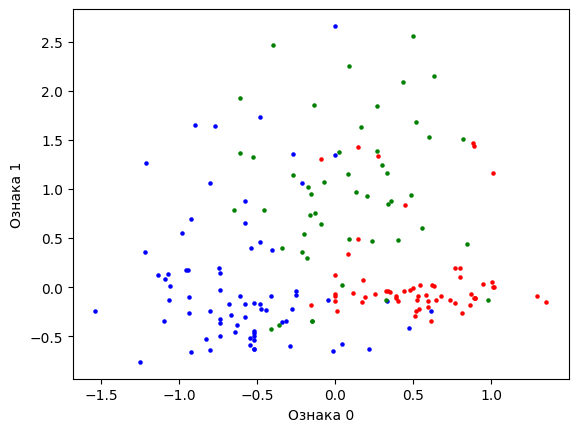

In [8]:
Color_dict = {0: 'red', 1: 'blue', 2: 'green'}
def Gen_plot(X,Y,size = 5):
	for _x,_y in zip(X,Y):
		plt.scatter(_x[0],_x[1], color = Color_dict[_y],s = size)
	
	for _y in np.unique(Y):
		ix = np.where(Y == _y)
		plt.scatter(X[ix][0][0],X[ix][0][1], c = Color_dict[_y], label = f'class {_y}', s = size)


Gen_plot(X_scaled[:,:2],Y)

plt.xlabel("Ознака 0")
plt.ylabel("Ознака 1")
plt.show()

The naive Bayes classifier assumes all the features are independent to each other. Even if the features depend on each other or upon the existence of the other features. Naive Bayes classifier considers all of these properties to independently contribute to the probability. A Gaussian Naive Bayes algorithm is a special type of NB algorithm. It’s specifically used when the features have continuous values. It’s also assumed that all the features are following a gaussian distribution i.e, normal distribution.


[0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.3, 0.35, 0.39999999999999997, 0.44999999999999996, 0.49999999999999994]
[1, 1, 1, 2, 1, 1, 1, 1, 1, 2]


Text(0, 0.5, 'Count')

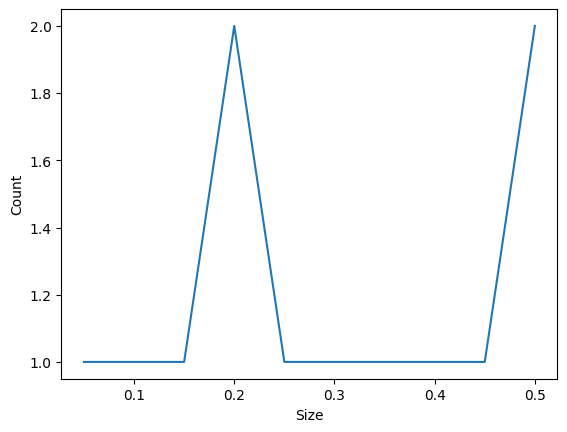

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()


i=0.05
x=[]
y=[]
while i<=0.5:
    X_train, X_test, y_train, y_test= train_test_split(X_scaled,Y,test_size=i)
    y_pred=gnb.fit(X_train,y_train).predict(X_test)
    temp=(y_test!=y_pred).sum()
    x.append(i)
    y.append(temp)
    i=i+0.05

print(x,y,sep='\n')

plt.plot(x,y)
plt.xlabel('Size')
plt.ylabel('Count')

Conclusions
The underfitting and overfitting are the two terms that need to be checked for the performance of the dataset and whether the dataset is generalizing well or not.
Overfitting is "the production of an analysis that corresponds too closely or exactly to a particular set of data, and may therefore fail to fit  additional data or predict future observations reliably".
Underfitting occurs when a mathematical model cannot adequately capture the underlying structure of the data.